In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')

import warnings
#warnings.filterwarnings('ignore')


In [83]:
data=pd.read_csv('/content/diabetes.csv')

**explore** **data**

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
data.duplicated().sum()

0

**Analysis**

In [12]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

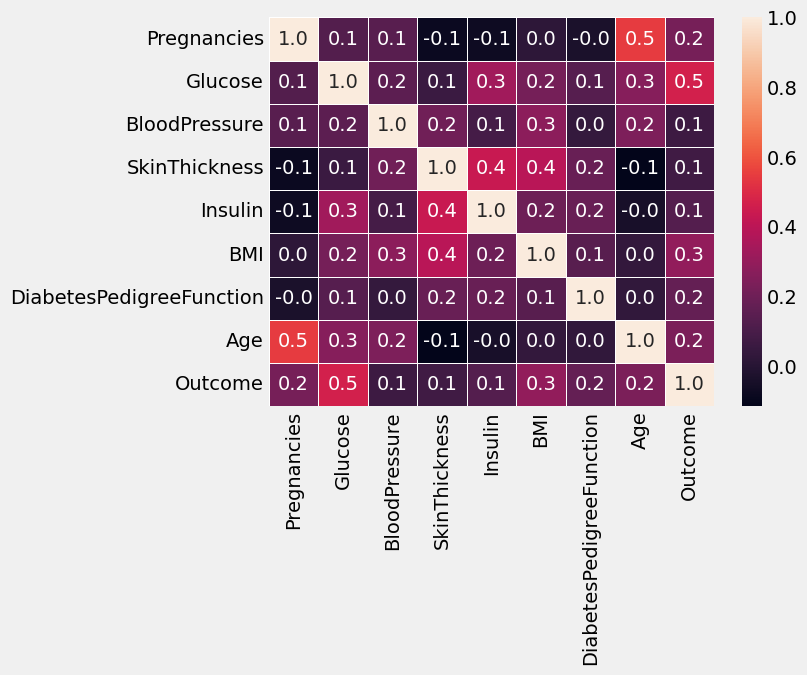

In [18]:

sns.heatmap(data.corr(), annot=True,fmt='0.1f',linewidths=.5)

<Axes: xlabel='Outcome', ylabel='count'>

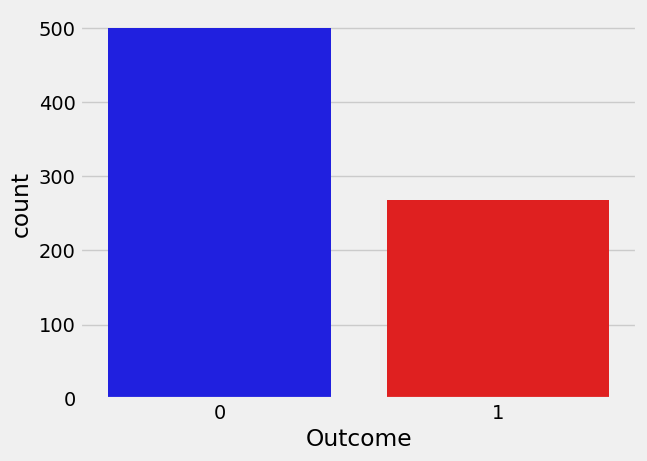

In [23]:
sns.countplot(x='Outcome',data=data,palette=['b','r'])

<ipython-input-25-576cc9002c2e>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,3)


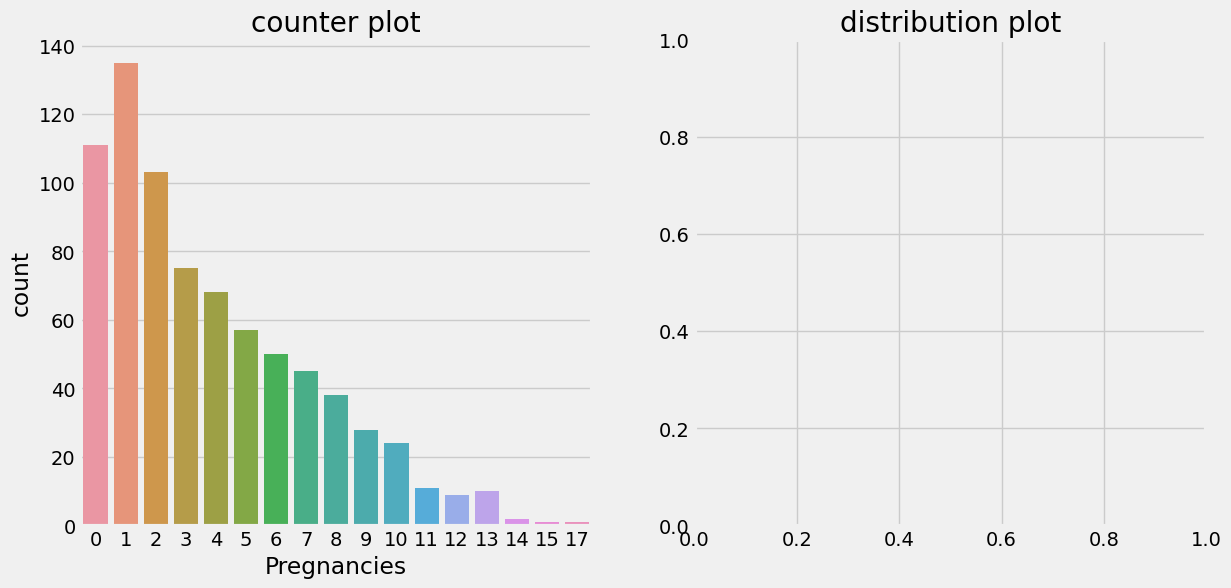

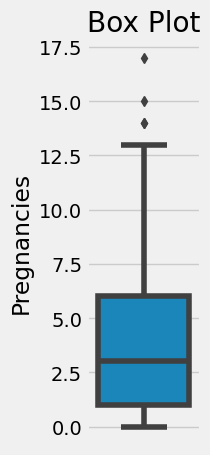

In [25]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('counter plot')
sns.countplot(x='Pregnancies',data=data)

plt.subplot(1,3,2)
plt.title('distribution plot')
sns.displot(data["Pregnancies"])
plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=data["Pregnancies"])
plt.show()


<Axes: >

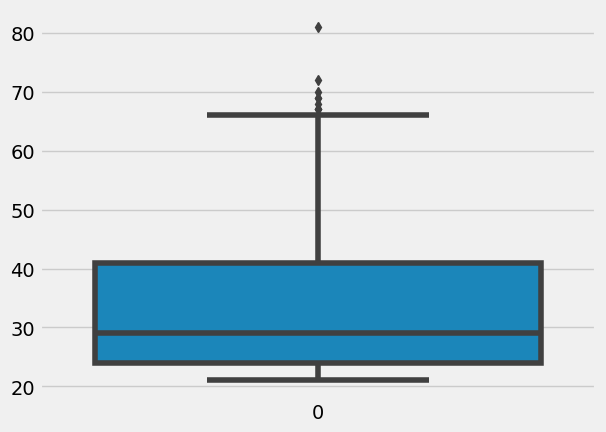

In [28]:
sns.boxplot(data.Age)

# **create** **model**

In [84]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [92]:
model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier()
model4=GradientBoostingClassifier(n_estimators=1000)
model5=KNeighborsClassifier()
model6=GaussianNB()

In [93]:
col=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier',' KNeighborsClassifier','GaussianNB']
result1=[]
result2=[]
result3=[]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
accuracy= 0.7402597402597403 recall= 0.7692307692307693 f1= 0.6666666666666667


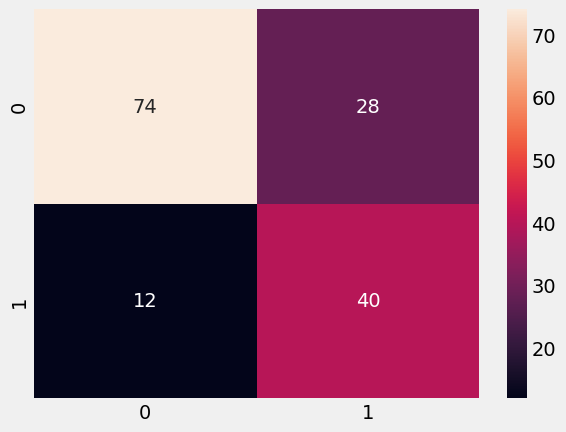

In [94]:
def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    acc=accuracy_score(pre,y_test)
    re=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)
    result1.append(acc)
    result2.append(re)
    result3.append(f1)
    confusion_matrix(pre,y_test)
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('accuracy=',acc,'recall=',re,'f1=',f1)
cal(model1)

SVC()
accuracy= 0.7142857142857143 recall= 0.7608695652173914 f1= 0.6140350877192983


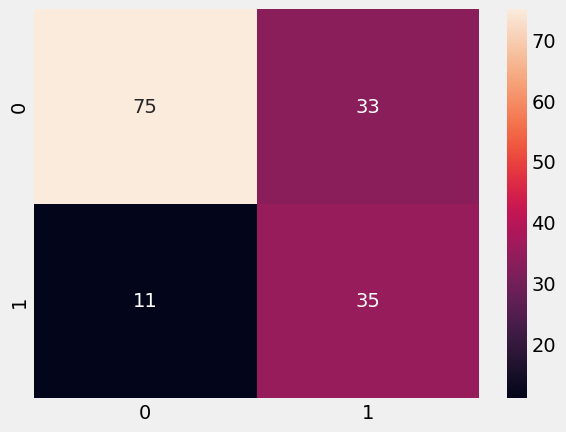

In [95]:
cal(model2)

RandomForestClassifier()
accuracy= 0.6818181818181818 recall= 0.6666666666666666 f1= 0.608


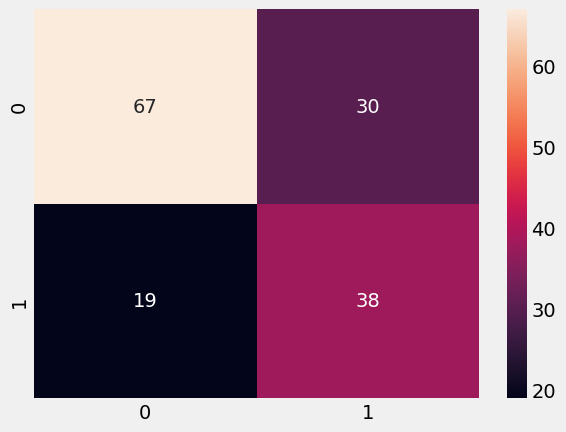

In [96]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy= 0.6948051948051948 recall= 0.6721311475409836 f1= 0.6356589147286822


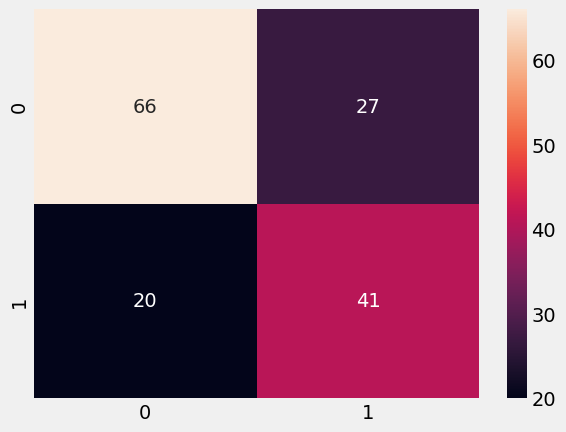

In [97]:
cal(model4)

KNeighborsClassifier()
accuracy= 0.6948051948051948 recall= 0.6842105263157895 f1= 0.6239999999999999


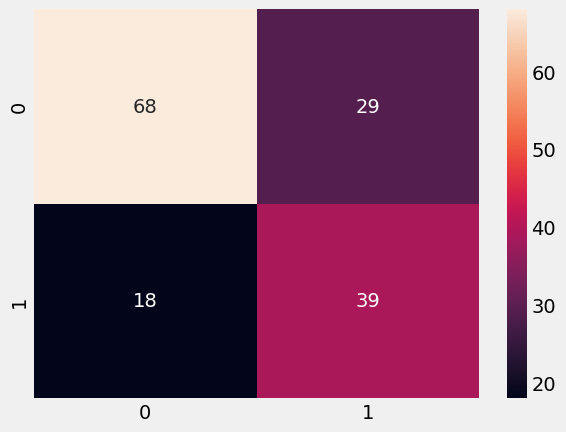

In [98]:
cal(model5)

GaussianNB()
accuracy= 0.7142857142857143 recall= 0.7222222222222222 f1= 0.639344262295082


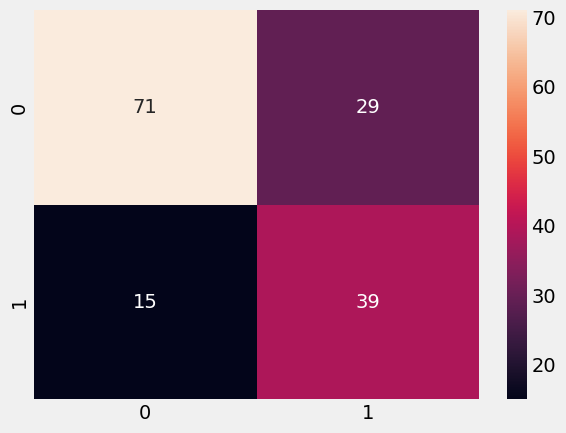

In [99]:
cal(model6)

In [100]:
final_result = pd.DataFrame({'Algorithms':col, 'Accuracies': result1, 'Recall': result2, 'F1_Score': result3})

print(final_result)

                   Algorithms  Accuracies    Recall  F1_Score
0          LogisticRegression    0.740260  0.769231  0.666667
1                         SVC    0.714286  0.760870  0.614035
2      RandomForestClassifier    0.681818  0.666667  0.608000
3  GradientBoostingClassifier    0.694805  0.672131  0.635659
4        KNeighborsClassifier    0.694805  0.684211  0.624000
5                  GaussianNB    0.714286  0.722222  0.639344


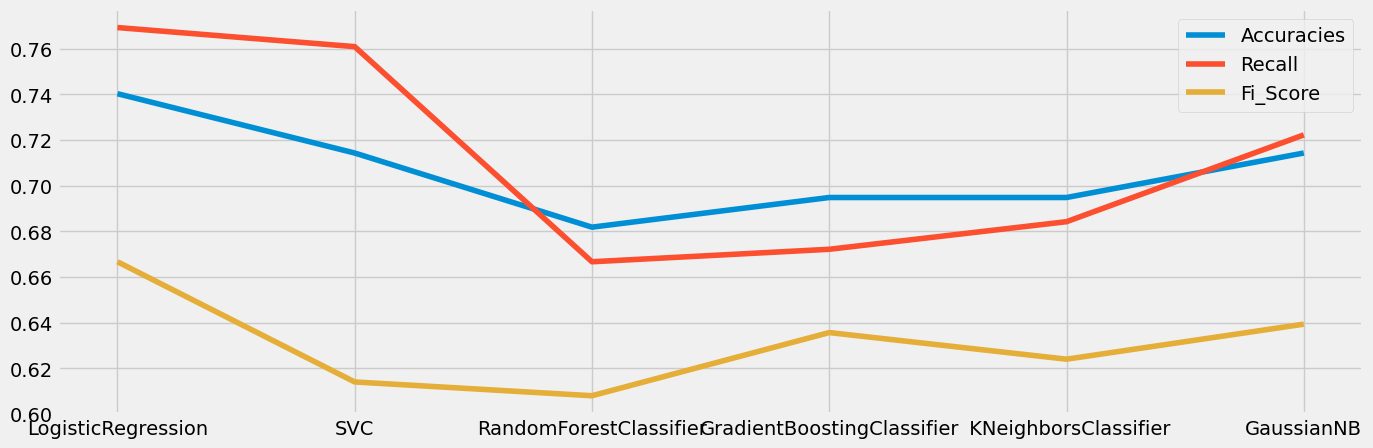

In [101]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(final_result.Algorithms,result1, label='Accuracies')
plt.plot(final_result.Algorithms,result2 , label='Recall')
plt.plot(final_result.Algorithms,result3 , label='Fi_Score')
plt.legend()
plt.show()